<a href="https://colab.research.google.com/github/anandratna348/CodeClauseInternship_age_gender_detection/blob/main/Copy_of_week5_1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import poisson, chisquare

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GOF_24t2_3xlsx.xlsx to GOF_24t2_3xlsx (1).xlsx


In [ ]:
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
data =df['obs']

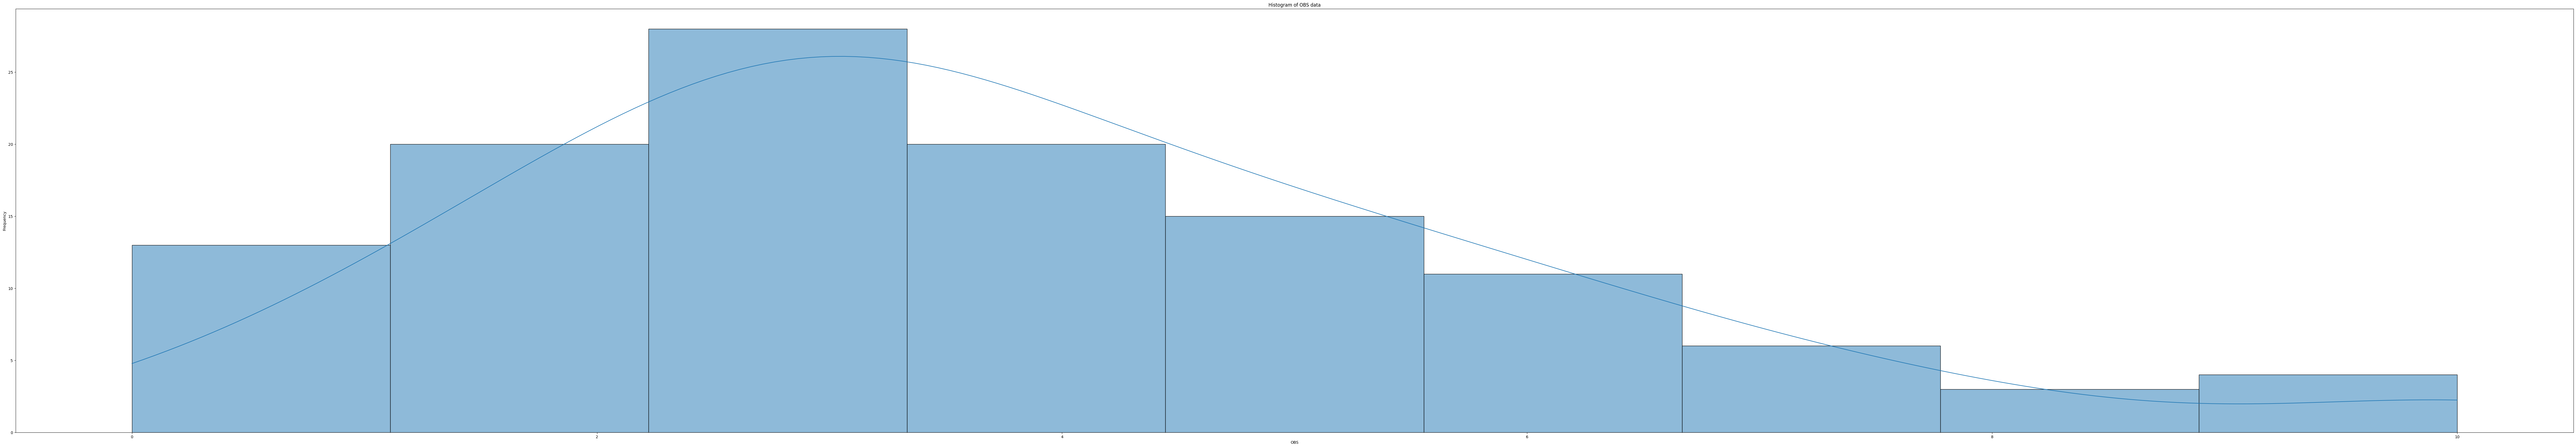

In [ ]:
plt.figure(figsize=(120, 20))
sns.histplot(data, kde=True)
plt.title('Histogram of OBS data')
plt.xlabel('OBS')
plt.ylabel('Frequency')
plt.show()

In [ ]:
shapiro_test = stats.shapiro(data)
print(f'Shapiro-Wilk test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

Shapiro-Wilk test: W=0.937048077583313, p-value=2.721800956351217e-05


Q1- Distribution Type

In [ ]:
is_discrete = np.all(np.equal(np.mod(data, 1), 0))

if is_discrete:
  print("Discrete")
else:
    print("Continuous")

Discrete


Q2 - Expected Defects

In [ ]:
expected_defects = np.mean(data)
print(round((expected_defects), 4))

3.8417


Q3

In [ ]:

mean = np.mean(data)
median = np.median(data)
mode_value = mode(data)

# Print descriptive statistics

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode_value}")

# Step 6: Determine the skewness
if mean > median > mode_value:
    skewness = "Right skewed distribution as the mean > median > mode"
elif mode_value> median > mean:
    skewness = "Left skewed distribution as the mode > median > mean"
elif mean < median < mode_value:
    skewness = "Left skewed distribution as the mean < median < mode"
elif mode_value > median > mean:
    skewness = "Right skewed distribution as the mode > median > mean"
elif mean == median == mode_value:
    skewness = "Symmetric distribution as the mean = median = mode"
elif mean > median == mode:
    skewness = "Right skewed distribution as the mean > mode=median"
else:
    skewness = "None of the above"

print(f"The total scratch can be assumed to have a {skewness}.")

Mean: 3.841666666666667
Median: 3.0
Mode: 3
The total scratch can be assumed to have a None of the above.


Q4

In [ ]:

prob_3_defects = stats.poisson.pmf(3, mean)
x= round((prob_3_defects), 4)
print(f"Probability of exactly 3 defects: {x}")

Probability of exactly 3 defects: 0.2028


Q5

In [ ]:



mean_obs = np.mean(data)

lambda_est = mean_obs

observed_freq, bins = np.histogram(data, bins=range(int(min(data)), int(max(data)) + 2))

expected_freq = [stats.poisson.pmf(k, lambda_est) * len(data) for k in range(int(min(data)), int(max(data)) + 1)]

expected_freq[-1] += len(data) - sum(expected_freq)

chi2 = sum((obs - exp) ** 2 / exp for obs, exp in zip(observed_freq, expected_freq))
y= round((chi2), 4)
print(f"Chi-square Statistic: {y}")

Chi-square Statistic: 17.1087


Q6

In [ ]:


observed_freq, bins = np.histogram(data, bins=range(int(min(data)), int(max(data)) + 2))

num_bins = len(observed_freq)
estimated_parameters = 1
degrees_of_freedom = num_bins - estimated_parameters - 1

print(f"Degrees of Freedom: {degrees_of_freedom}")

Degrees of Freedom: 9
